# ADVSTAT MCMC

Using Metropolis Hastings Algorithm


In [252]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
from matplotlib.pylab import *
import csv
import random
import seaborn as sns
%matplotlib inline
from scipy.stats import norm
def calc_posterior_analytical(data, x, mu_0, sigma_0):
    sigma = 1.
    n = len(data)
    mu_post = (mu_0 / sigma_0**2 + sum(map(float,data)) / sigma**2) / (1. / sigma_0**2 + n / sigma**2)
    sigma_post = (1. / sigma_0**2 + n / sigma**2)**-1
    return norm(mu_post, np.sqrt(sigma_post)).pdf(x)


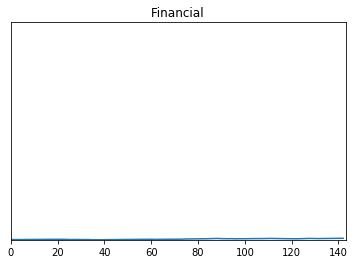

In [277]:
posterior = 0
prior = 0

alldata = []
financials = []
industrials = []
holfirms = []
propty = []
services = []
minoil = []
xaxis = []
xnum = 0
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
with open('stock.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        financials.append(float(row[0]))
        industrials.append(float(row[1]))
        holfirms.append(float(row[2]))
        propty.append(float(row[3]))
        services.append(float(row[4]))
        minoil.append(float(row[5]))
        xaxis.append(xnum)
        xnum = xnum + 1
        #print(row[0])
        

        
#plt.figure(figsize=(20,50))
plt.plot(xaxis, financials)
plt.title('Financial')
plt.yticks([])
plt.axis([0, 143, 0, 143])
plt.show()

#posterior_analytical = calc_posterior_analytical(financials, x, 0., 1.)
#ax.plot(x, posterior_analytical)
#ax.set(xlabel='mu', ylabel='belief', title='Analytical posterior');
#sns.despine()

# plt.plot(xaxis, industrials)
# plt.title('Industrial')
# plt.yticks([])
# plt.axis([0, 143, 0, 143])
# plt.show()

# plt.plot(xaxis, holfirms)
# plt.title('Holding Firms')
# plt.yticks([])
# plt.axis([0, 143, 0, 143])
# plt.show()

# plt.plot(xaxis, propty)
# plt.title('Properties')
# plt.yticks([])
# plt.axis([0, 143, 0, 143])
# plt.show()

# plt.plot(xaxis, services)
# plt.title('Services')
# plt.yticks([])
# plt.axis([0, 143, 0, 143])
# plt.show()

# plt.plot(xaxis, minoil)
# plt.title('Mining & Oil')
# plt.yticks([])
# plt.axis([0, 143, 0, 143])
# plt.show()
# alldata.append(financials)
# alldata.append(industrials)
# alldata.append(holfirms)
# alldata.append(propty)
# alldata.append(services)
# alldata.append(minoil)


In [278]:
#this is for theta for metropolis hasting, check video for more info
oldtheta = np.random.normal(0.5, 0.1, 1)
newtheta = np.random.normal(oldtheta, 0.1, 1)

#so in the case of the video, posterior(newtheta) / posterior(oldtheta)
#then just replace oldtheta with newtheta when needed and then create newtheta using oldtheta again
#NEW CODE STARTS HERE.......................................


In [279]:
def sampler(data, samples, mu_init=.5, proposal_width=.5, plot=False, mu_prior_mu=0, mu_prior_sd=1.):
    mu_current = mu_init
    posterior = [mu_current]
    for i in xrange(0,samples):
        # suggest new position
        mu_proposal = norm(mu_current, proposal_width).rvs()

        # Compute likelihood by multiplying probabilities of each data point
        likelihood_current = norm(mu_current, 1).pdf(data).prod()
        likelihood_proposal = norm(mu_proposal, 1).pdf(data).prod()
        
        # Compute prior probability of current and proposed mu        
        prior_current = norm(mu_prior_mu, mu_prior_sd).pdf(mu_current)
        prior_proposal = norm(mu_prior_mu, mu_prior_sd).pdf(mu_proposal)
        
        p_current = likelihood_current * prior_current
        p_proposal = likelihood_proposal * prior_proposal
        
        # Accept proposal?
        p_accept = p_proposal / p_current
        
        # Usually would include prior probability, which we neglect here for simplicity
        accept = np.random.rand() < p_accept
        
        if plot:
            if i > 141 or i ==1:
                plot_proposal(mu_current, mu_proposal, mu_prior_mu, mu_prior_sd, data, accept, posterior, i)
        
        if accept:
            # Update position
            mu_current = mu_proposal
        
        posterior.append(mu_current)
        
    return posterior

# Function to display
def plot_proposal(mu_current, mu_proposal, mu_prior_mu, mu_prior_sd, data, accepted, trace, i):
    from copy import copy
    trace = copy(trace)
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(16, 4))
    fig.suptitle('Iteration %i' % (i + 1))
    x = np.linspace(-3, 3, 5000)
    color = 'g' if accepted else 'r'
        
    # Plot prior
    prior_current = norm(mu_prior_mu, mu_prior_sd).pdf(mu_current)
    prior_proposal = norm(mu_prior_mu, mu_prior_sd).pdf(mu_proposal)
    prior = norm(mu_prior_mu, mu_prior_sd).pdf(x)
    ax1.plot(x, prior)
    ax1.plot([mu_current] * 2, [0, prior_current], marker='o', color='b')
    ax1.plot([mu_proposal] * 2, [0, prior_proposal], marker='o', color=color)
    ax1.annotate("", xy=(mu_proposal, 0.2), xytext=(mu_current, 0.2),
                 arrowprops=dict(arrowstyle="->", lw=2.))
    ax1.set(ylabel='Probability Density', title='current: prior(mu=%.2f) = %.2f\nproposal: prior(mu=%.2f) = %.2f' % (mu_current, prior_current, mu_proposal, prior_proposal))
    
    # Likelihood
    likelihood_current = norm(mu_current, 1).pdf(data).prod()
    likelihood_proposal = norm(mu_proposal, 1).pdf(data).prod()
    y = norm(loc=mu_proposal, scale=1).pdf(x)
    sns.distplot(data, kde=False, norm_hist=True, ax=ax2)
    ax2.plot(x, y, color=color)
    ax2.axvline(mu_current, color='b', linestyle='--', label='mu_current')
    ax2.axvline(mu_proposal, color=color, linestyle='--', label='mu_proposal')
    #ax2.title('Proposal {}'.format('accepted' if accepted else 'rejected'))
    ax2.annotate("", xy=(mu_proposal, 0.2), xytext=(mu_current, 0.2),
                 arrowprops=dict(arrowstyle="->", lw=2.))
    ax2.set(title='likelihood(mu=%.2f) = %.2f\nlikelihood(mu=%.2f) = %.2f' % (mu_current, 1e14*likelihood_current, mu_proposal, 1e14*likelihood_proposal))
    
    # Posterior
    posterior_analytical = calc_posterior_analytical(data, x, mu_prior_mu, mu_prior_sd)
    ax3.plot(x, posterior_analytical)
    posterior_current = calc_posterior_analytical(data, mu_current, mu_prior_mu, mu_prior_sd)
    posterior_proposal = calc_posterior_analytical(data, mu_proposal, mu_prior_mu, mu_prior_sd)
    ax3.plot([mu_current] * 2, [0, posterior_current], marker='o', color='b')
    ax3.plot([mu_proposal] * 2, [0, posterior_proposal], marker='o', color=color)
    ax3.annotate("", xy=(mu_proposal, 0.2), xytext=(mu_current, 0.2),
                 arrowprops=dict(arrowstyle="->", lw=2.))
    #x3.set(title=r'prior x likelihood $\propto$ posterior')
    ax3.set(title='posterior(mu=%.2f) = %.5f\nposterior(mu=%.2f) = %.5f' % (mu_current, posterior_current, mu_proposal, posterior_proposal))
    
    if accepted:
        trace.append(mu_proposal)
    else:
        trace.append(mu_current)
    ax4.plot(trace)
    ax4.set(xlabel='iteration', ylabel='mu', title='trace')
    plt.tight_layout()
    #plt.legend()
            

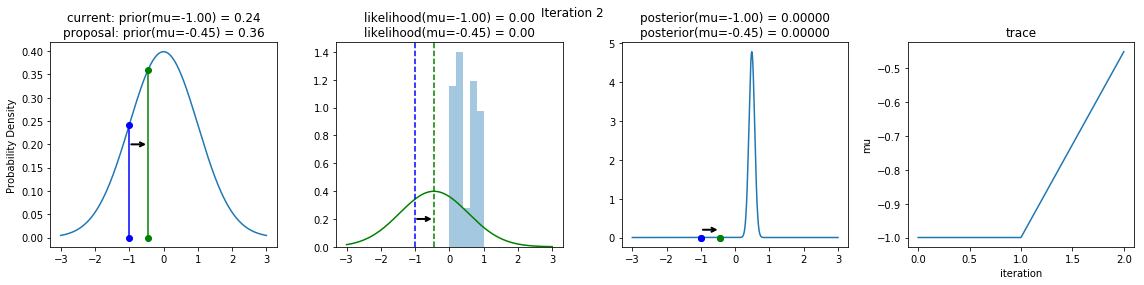

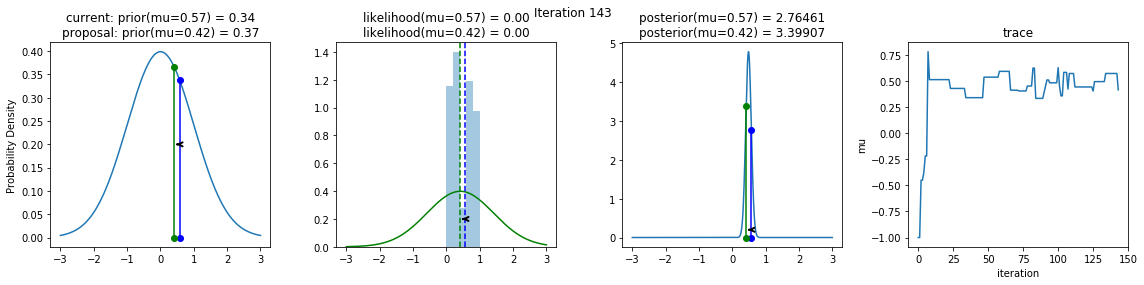

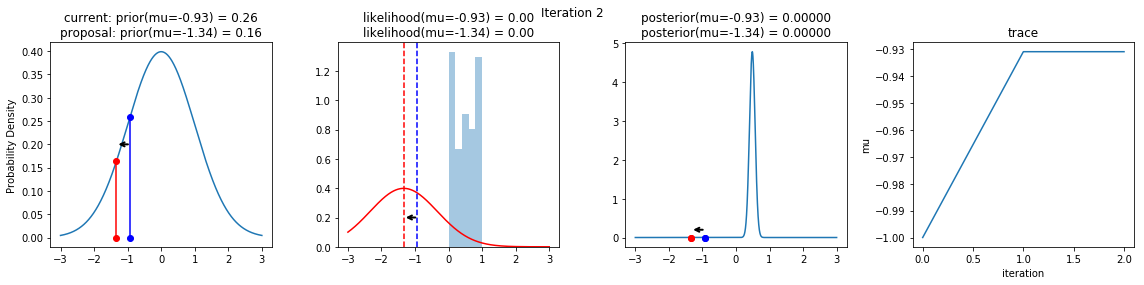

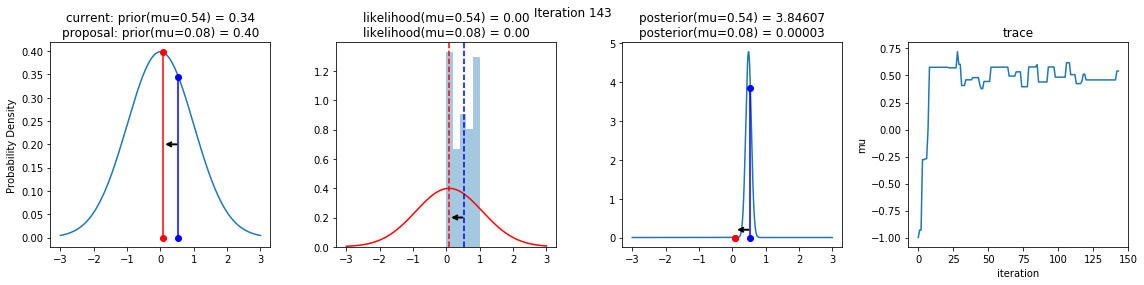

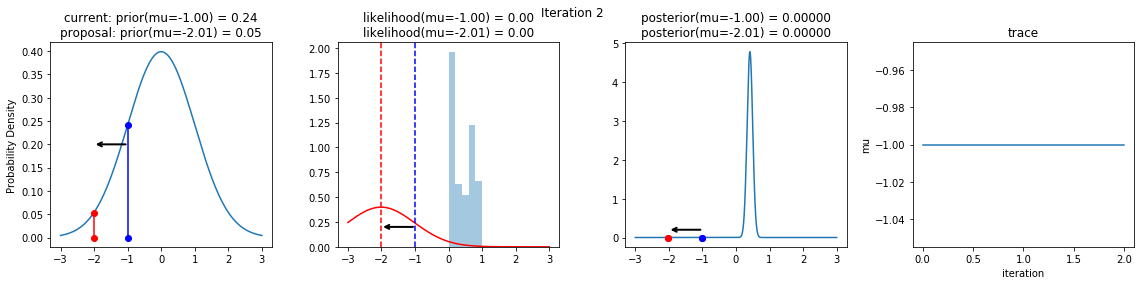

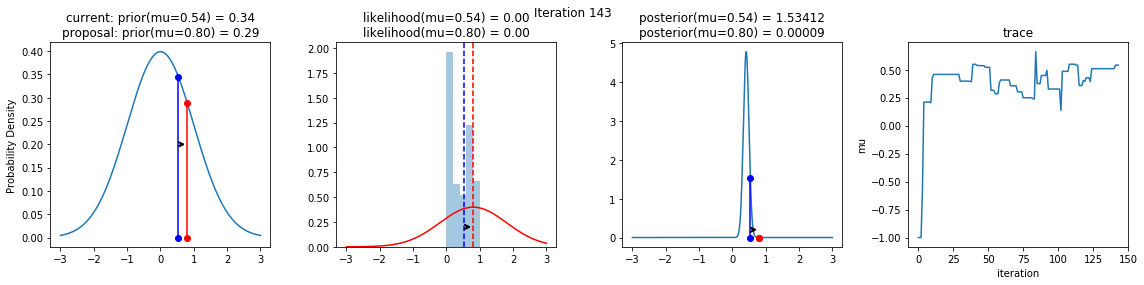

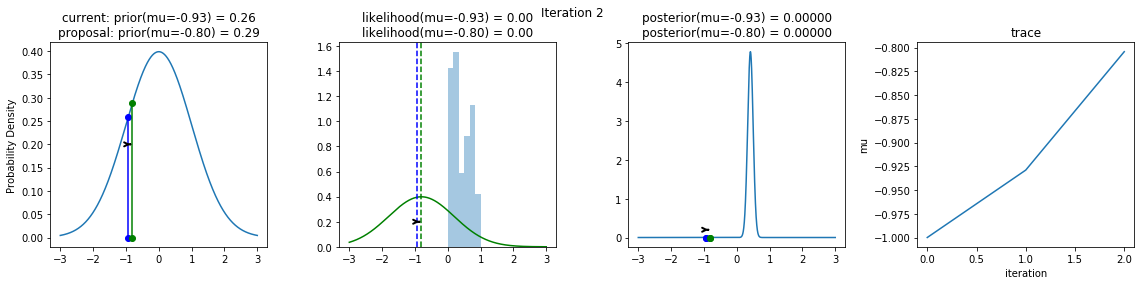

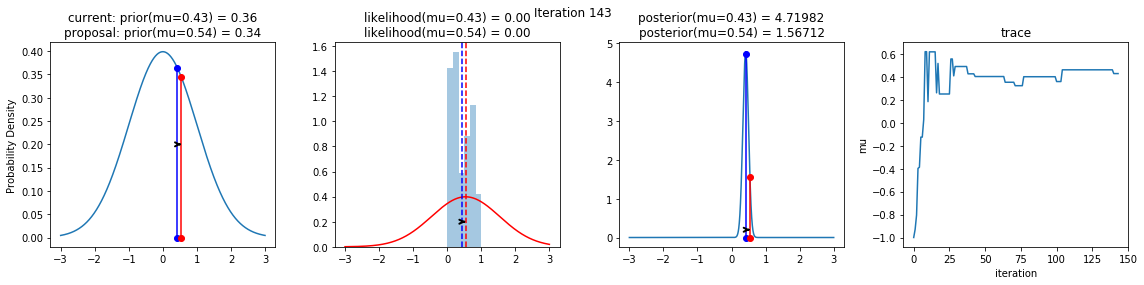

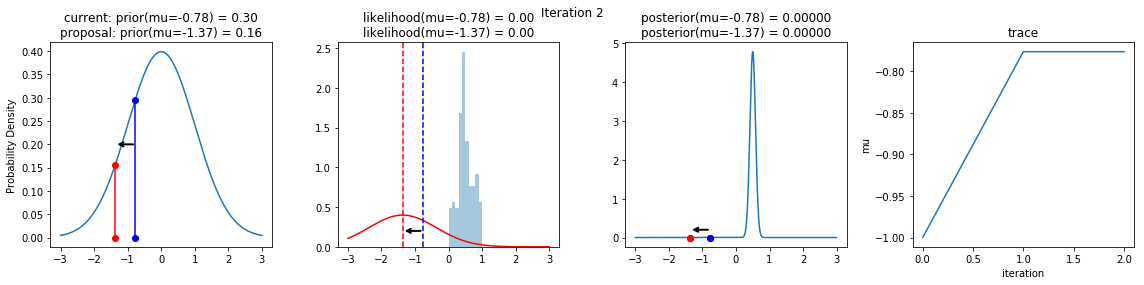

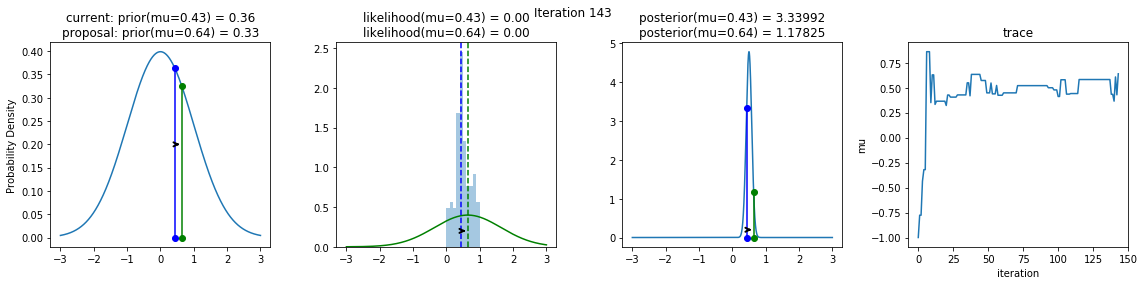

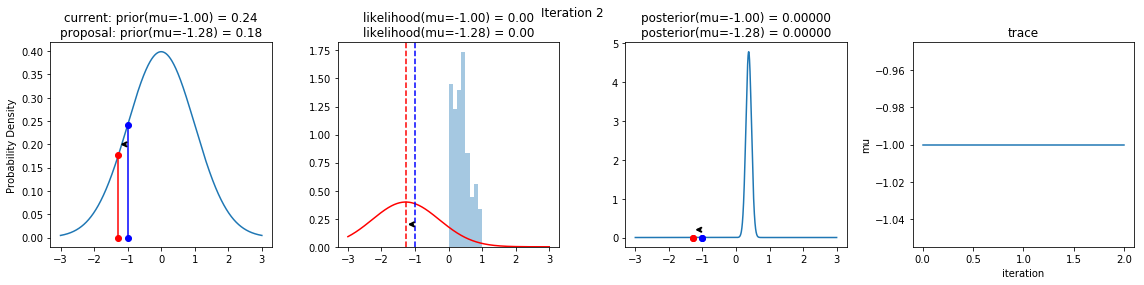

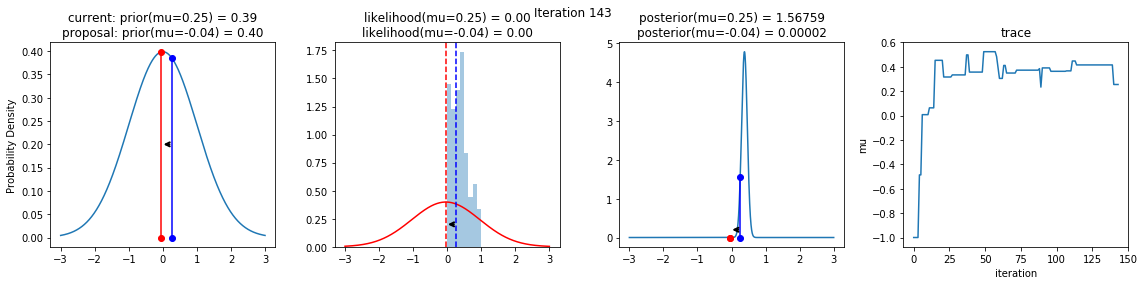

In [280]:
samples =143
sampler(financials, samples, mu_init=-1., plot=True);
sampler(industrials, samples, mu_init=-1., plot=True);
sampler(holfirms, samples, mu_init=-1., plot=True);
sampler(propty, samples, mu_init=-1., plot=True);
sampler(services, samples, mu_init=-1., plot=True);
sampler(minoil, samples, mu_init=-1., plot=True);

